In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', 'src')))

import pyAgrum as gum
%reload_ext autoreload
%autoreload 2
from DynamicBayesNet import DynamicBayesNet
from notebook import showKTBN, showUnrolled
from notebook import unrollKTBN, showCPT
from notebook import flow, getPosterior, plotFollow


# TESTS WITH ANOTHER SEPARATOR THAN THE DEFAULT SEPERATOR "#"

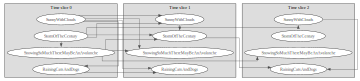

In [2]:
# tests with another separator than the default "#"
threeDBN = DynamicBayesNet(3, separator="|")
SunnyWithClouds = gum.LabelizedVariable("SunnyWithClouds","SunnyWithClouds",6)
RainingCatsAndDogs = gum.LabelizedVariable("RainingCatsAndDogs","RainingCatsAndDogs",6)
StormOfTheCentury = gum.LabelizedVariable("StormOfTheCentury","StormOfTheCentury",6)
#SnowingSoMuchThereMayBeAnAvalanche will be added with addFast function

threeDBN.add(SunnyWithClouds)
threeDBN.add(RainingCatsAndDogs)
threeDBN.add(StormOfTheCentury)
threeDBN.addFast('SnowingSoMuchThereMayBeAnAvalanche{1|3|9}')


threeDBN.addArc(("StormOfTheCentury", 0), ("SnowingSoMuchThereMayBeAnAvalanche", 0))
threeDBN.addArc(("StormOfTheCentury", 0), ("SunnyWithClouds", 1))
threeDBN.addArc(("StormOfTheCentury", 0), ("StormOfTheCentury", 1))
threeDBN.addArc(("SnowingSoMuchThereMayBeAnAvalanche", 0), ("StormOfTheCentury", 1))
threeDBN.addArc(("SnowingSoMuchThereMayBeAnAvalanche", 0), ("SnowingSoMuchThereMayBeAnAvalanche", 1))
threeDBN.addArc(("SunnyWithClouds", 0), ("SunnyWithClouds", 1))
threeDBN.addArc(("SunnyWithClouds", 0), ("SnowingSoMuchThereMayBeAnAvalanche", 1))
threeDBN.addArc(("SunnyWithClouds", 0), ("RainingCatsAndDogs", 1))
threeDBN.addArc(("SunnyWithClouds", 0), ("RainingCatsAndDogs", 0))
threeDBN.addArc(("SunnyWithClouds", 1), ("StormOfTheCentury", 1))
threeDBN.addArc(("RainingCatsAndDogs", 0), ("RainingCatsAndDogs", 1))
threeDBN.addArc(("SnowingSoMuchThereMayBeAnAvalanche", 0), ("SnowingSoMuchThereMayBeAnAvalanche", 2))
threeDBN.addArc(("StormOfTheCentury", 0), ("SunnyWithClouds", 2))
threeDBN.addArc(("StormOfTheCentury", 1), ("RainingCatsAndDogs", 2))
threeDBN.addArc(("SunnyWithClouds", 2), ("RainingCatsAndDogs", 2))

showKTBN(threeDBN)

In [3]:
threeDBN.generateCPTs()
showCPT(threeDBN, ("SunnyWithClouds", 2))

(pyAgrum.Potential<double>@0000020A2554D570) 
      ||  SunnyWithClouds,2                                        |
StormO||0        |1        |2        |3        |4        |5        |
------||---------|---------|---------|---------|---------|---------|
0     || 0.1269  | 0.1623  | 0.1711  | 0.0702  | 0.1992  | 0.2703  |
1     || 0.1837  | 0.0908  | 0.1597  | 0.1623  | 0.2007  | 0.2029  |
2     || 0.0933  | 0.0629  | 0.0547  | 0.0919  | 0.3567  | 0.3405  |
3     || 0.2066  | 0.2131  | 0.1231  | 0.1356  | 0.1335  | 0.1880  |
4     || 0.0791  | 0.1187  | 0.1099  | 0.2730  | 0.2108  | 0.2085  |
5     || 0.0862  | 0.2751  | 0.0484  | 0.1409  | 0.3251  | 0.1243  |

In [4]:
print(threeDBN.cpt(("SunnyWithClouds", 1)))
showCPT(threeDBN, ("SunnyWithClouds", 1))


             ||  SunnyWithClouds,1                                        |
StormO|SunnyW||0        |1        |2        |3        |4        |5        |
------|------||---------|---------|---------|---------|---------|---------|
0     |0     || 0.2005  | 0.1159  | 0.1710  | 0.1705  | 0.2217  | 0.1204  |
1     |0     || 0.2091  | 0.1064  | 0.2308  | 0.1987  | 0.0692  | 0.1859  |
2     |0     || 0.1141  | 0.0409  | 0.2282  | 0.2102  | 0.2353  | 0.1713  |
3     |0     || 0.1741  | 0.1277  | 0.0589  | 0.2788  | 0.2729  | 0.0876  |
4     |0     || 0.1988  | 0.3197  | 0.0001  | 0.2979  | 0.1278  | 0.0557  |
5     |0     || 0.0292  | 0.1464  | 0.1528  | 0.2808  | 0.1123  | 0.2785  |
[...24 more line(s) ...]
0     |5     || 0.2145  | 0.1554  | 0.2394  | 0.1194  | 0.1530  | 0.1182  |
1     |5     || 0.1219  | 0.2882  | 0.2692  | 0.0862  | 0.1287  | 0.1059  |
2     |5     || 0.2105  | 0.1262  | 0.2306  | 0.1307  | 0.1488  | 0.1532  |
3     |5     || 0.2933  | 0.0175  | 0.2556  | 0.2327  | 0.0043

(pyAgrum.Potential<double>@0000020A2A974120) 
             ||  SunnyWithClouds,1                                        |
StormO|SunnyW||0        |1        |2        |3        |4        |5        |
------|------||---------|---------|---------|---------|---------|---------|
0     |0     || 0.2005  | 0.1159  | 0.1710  | 0.1705  | 0.2217  | 0.1204  |
1     |0     || 0.2091  | 0.1064  | 0.2308  | 0.1987  | 0.0692  | 0.1859  |
2     |0     || 0.1141  | 0.0409  | 0.2282  | 0.2102  | 0.2353  | 0.1713  |
3     |0     || 0.1741  | 0.1277  | 0.0589  | 0.2788  | 0.2729  | 0.0876  |
4     |0     || 0.1988  | 0.3197  | 0.0001  | 0.2979  | 0.1278  | 0.0557  |
5     |0     || 0.0292  | 0.1464  | 0.1528  | 0.2808  | 0.1123  | 0.2785  |
[...24 more line(s) ...]
0     |5     || 0.2145  | 0.1554  | 0.2394  | 0.1194  | 0.1530  | 0.1182  |
1     |5     || 0.1219  | 0.2882  | 0.2692  | 0.0862  | 0.1287  | 0.1059  |
2     |5     || 0.2105  | 0.1262  | 0.2306  | 0.1307  | 0.1488  | 0.1532  |
3     |5     || 0.2933  | 0.0175  | 0.2556  | 0.2327  | 0.0043  | 0.1966  |
4     |5     || 0.2009  | 0.2636  | 0.1799  | 0.1530  | 0.0672  | 0.1353  |
5     |5     || 0.2556  | 0.1432  | 0.0163  | 0.2819  | 0.2442  | 0.0588  |

## Now we use the other methods of displaying names

### Using Reverse

In [5]:
threeDBN.name_display_mode = "reverse"
print(threeDBN.cpt(("SunnyWithClouds", 1)))
showCPT(threeDBN, ("SunnyWithClouds", 1))


             ||  1,SunnyWithClouds                                        |
0,Stor|0,Sunn||0        |1        |2        |3        |4        |5        |
------|------||---------|---------|---------|---------|---------|---------|
0     |0     || 0.2005  | 0.1159  | 0.1710  | 0.1705  | 0.2217  | 0.1204  |
1     |0     || 0.2091  | 0.1064  | 0.2308  | 0.1987  | 0.0692  | 0.1859  |
2     |0     || 0.1141  | 0.0409  | 0.2282  | 0.2102  | 0.2353  | 0.1713  |
3     |0     || 0.1741  | 0.1277  | 0.0589  | 0.2788  | 0.2729  | 0.0876  |
4     |0     || 0.1988  | 0.3197  | 0.0001  | 0.2979  | 0.1278  | 0.0557  |
5     |0     || 0.0292  | 0.1464  | 0.1528  | 0.2808  | 0.1123  | 0.2785  |
[...24 more line(s) ...]
0     |5     || 0.2145  | 0.1554  | 0.2394  | 0.1194  | 0.1530  | 0.1182  |
1     |5     || 0.1219  | 0.2882  | 0.2692  | 0.0862  | 0.1287  | 0.1059  |
2     |5     || 0.2105  | 0.1262  | 0.2306  | 0.1307  | 0.1488  | 0.1532  |
3     |5     || 0.2933  | 0.0175  | 0.2556  | 0.2327  | 0.0043

(pyAgrum.Potential<double>@0000020A2A9740A0) 
             ||  1,SunnyWithClouds                                        |
0,Stor|0,Sunn||0        |1        |2        |3        |4        |5        |
------|------||---------|---------|---------|---------|---------|---------|
0     |0     || 0.2005  | 0.1159  | 0.1710  | 0.1705  | 0.2217  | 0.1204  |
1     |0     || 0.2091  | 0.1064  | 0.2308  | 0.1987  | 0.0692  | 0.1859  |
2     |0     || 0.1141  | 0.0409  | 0.2282  | 0.2102  | 0.2353  | 0.1713  |
3     |0     || 0.1741  | 0.1277  | 0.0589  | 0.2788  | 0.2729  | 0.0876  |
4     |0     || 0.1988  | 0.3197  | 0.0001  | 0.2979  | 0.1278  | 0.0557  |
5     |0     || 0.0292  | 0.1464  | 0.1528  | 0.2808  | 0.1123  | 0.2785  |
[...24 more line(s) ...]
0     |5     || 0.2145  | 0.1554  | 0.2394  | 0.1194  | 0.1530  | 0.1182  |
1     |5     || 0.1219  | 0.2882  | 0.2692  | 0.0862  | 0.1287  | 0.1059  |
2     |5     || 0.2105  | 0.1262  | 0.2306  | 0.1307  | 0.1488  | 0.1532  |
3     |5     || 0.2933  | 0.0175  | 0.2556  | 0.2327  | 0.0043  | 0.1966  |
4     |5     || 0.2009  | 0.2636  | 0.1799  | 0.1530  | 0.0672  | 0.1353  |
5     |5     || 0.2556  | 0.1432  | 0.0163  | 0.2819  | 0.2442  | 0.0588  |

## Using Classic

In [6]:
threeDBN.name_display_mode = "classic"
print(threeDBN.cpt(("SunnyWithClouds", 1)))
showCPT(threeDBN, ("SunnyWithClouds", 1))


             ||  ('SunnyWithClouds', 1)                                   |
('Stor|('Sunn||0        |1        |2        |3        |4        |5        |
------|------||---------|---------|---------|---------|---------|---------|
0     |0     || 0.2005  | 0.1159  | 0.1710  | 0.1705  | 0.2217  | 0.1204  |
1     |0     || 0.2091  | 0.1064  | 0.2308  | 0.1987  | 0.0692  | 0.1859  |
2     |0     || 0.1141  | 0.0409  | 0.2282  | 0.2102  | 0.2353  | 0.1713  |
3     |0     || 0.1741  | 0.1277  | 0.0589  | 0.2788  | 0.2729  | 0.0876  |
4     |0     || 0.1988  | 0.3197  | 0.0001  | 0.2979  | 0.1278  | 0.0557  |
5     |0     || 0.0292  | 0.1464  | 0.1528  | 0.2808  | 0.1123  | 0.2785  |
[...24 more line(s) ...]
0     |5     || 0.2145  | 0.1554  | 0.2394  | 0.1194  | 0.1530  | 0.1182  |
1     |5     || 0.1219  | 0.2882  | 0.2692  | 0.0862  | 0.1287  | 0.1059  |
2     |5     || 0.2105  | 0.1262  | 0.2306  | 0.1307  | 0.1488  | 0.1532  |
3     |5     || 0.2933  | 0.0175  | 0.2556  | 0.2327  | 0.0043

(pyAgrum.Potential<double>@0000020A2A974160) 
             ||  ('SunnyWithClouds', 1)                                   |
('Stor|('Sunn||0        |1        |2        |3        |4        |5        |
------|------||---------|---------|---------|---------|---------|---------|
0     |0     || 0.2005  | 0.1159  | 0.1710  | 0.1705  | 0.2217  | 0.1204  |
1     |0     || 0.2091  | 0.1064  | 0.2308  | 0.1987  | 0.0692  | 0.1859  |
2     |0     || 0.1141  | 0.0409  | 0.2282  | 0.2102  | 0.2353  | 0.1713  |
3     |0     || 0.1741  | 0.1277  | 0.0589  | 0.2788  | 0.2729  | 0.0876  |
4     |0     || 0.1988  | 0.3197  | 0.0001  | 0.2979  | 0.1278  | 0.0557  |
5     |0     || 0.0292  | 0.1464  | 0.1528  | 0.2808  | 0.1123  | 0.2785  |
[...24 more line(s) ...]
0     |5     || 0.2145  | 0.1554  | 0.2394  | 0.1194  | 0.1530  | 0.1182  |
1     |5     || 0.1219  | 0.2882  | 0.2692  | 0.0862  | 0.1287  | 0.1059  |
2     |5     || 0.2105  | 0.1262  | 0.2306  | 0.1307  | 0.1488  | 0.1532  |
3     |5     || 0.2933  | 0.0175  | 0.2556  | 0.2327  | 0.0043  | 0.1966  |
4     |5     || 0.2009  | 0.2636  | 0.1799  | 0.1530  | 0.0672  | 0.1353  |
5     |5     || 0.2556  | 0.1432  | 0.0163  | 0.2819  | 0.2442  | 0.0588  |

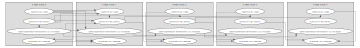

In [7]:
T = 5

dbn = unrollKTBN(threeDBN, T)
showUnrolled(dbn, T)


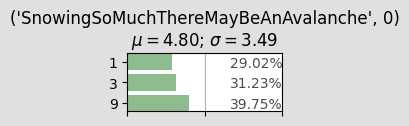
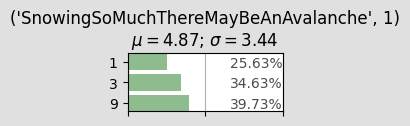
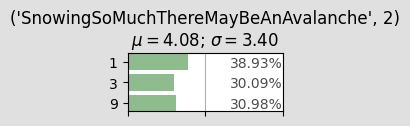
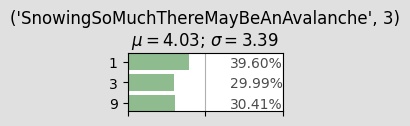
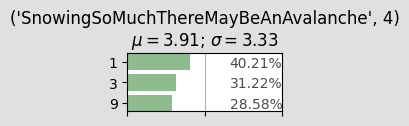

In [8]:
flow.clear()
for i in range(T):
    flow.add_html(getPosterior(dbn,target=('SnowingSoMuchThereMayBeAnAvalanche', i),evs={}),"P(SnowingSoMuchThereMayBeAnAvalanche,"+str(i)+")")
flow.display()

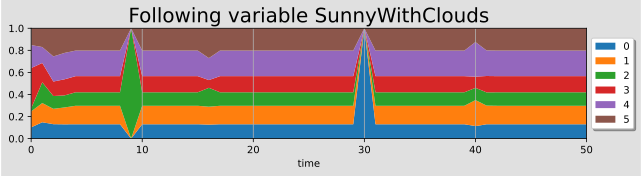

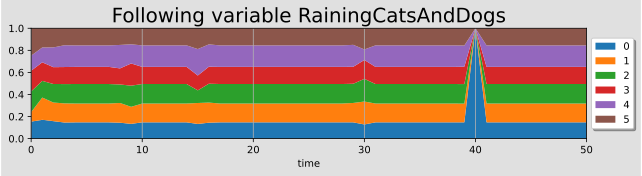

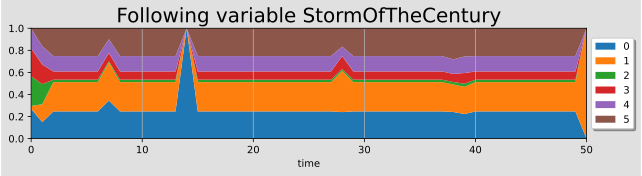

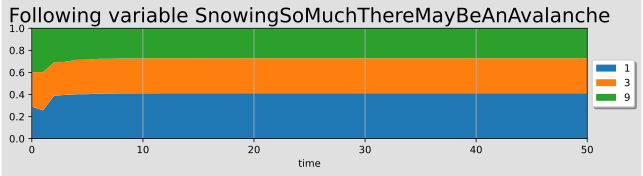

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
plotFollow(["SunnyWithClouds","RainingCatsAndDogs", "StormOfTheCentury", "SnowingSoMuchThereMayBeAnAvalanche"], threeDBN, T=51, evs={('SunnyWithClouds',9):2, ('SunnyWithClouds',30):0, ('StormOfTheCentury',14):0, ('RainingCatsAndDogs',40):0, ('StormOfTheCentury',50):1})